In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [38]:
df_train = pd.read_csv('/Users/d/Documents/Class/ZNA/df.csv')
df_train['Cancer Rate'].describe()

count    627.000000
mean       0.542123
std        0.142866
min        0.200386
25%        0.425290
50%        0.517464
75%        0.652080
max        0.985108
Name: Cancer Rate, dtype: float64

Text(0.5,1,'Cancer Incidents by County')

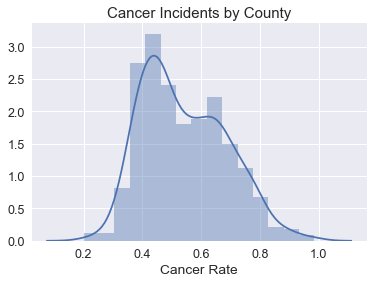

In [30]:
sns.distplot(df_train['Cancer Rate'])
# plt.ylabel('Cancer Incident', fontsize=12)
plt.title("Cancer Incidents by County", fontsize=15)

In [14]:
print("Skewness: %f" % df_train['Cancer Rate'].skew())
print("Kurtosis: %f" % df_train['Cancer Rate'].kurt())

Skewness: 0.450272
Kurtosis: -0.466571


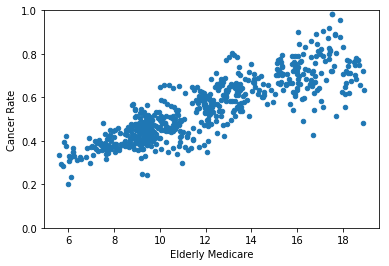

In [16]:
var = 'Elderly Medicare'
data = pd.concat([df_train['Cancer Rate'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Cancer Rate', ylim=(0,1))
# Cancer Incident | Medicare Rate

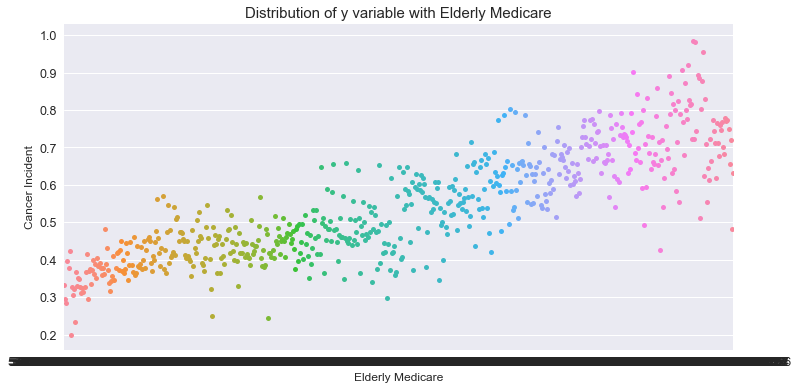

In [33]:
var_name = "Elderly Medicare"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y=df_train['Cancer Rate'], data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('Cancer Incident', fontsize=12)
plt.title("Distribution of Cancer Incident variable with "+var_name, fontsize=15)
plt.show()

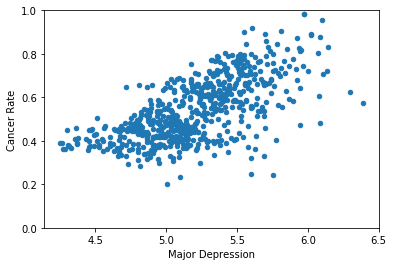

In [17]:
var = 'Major Depression'
data = pd.concat([df_train['Cancer Rate'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Cancer Rate', ylim=(0,1))

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(-0.5, 6.5, 0, 1)

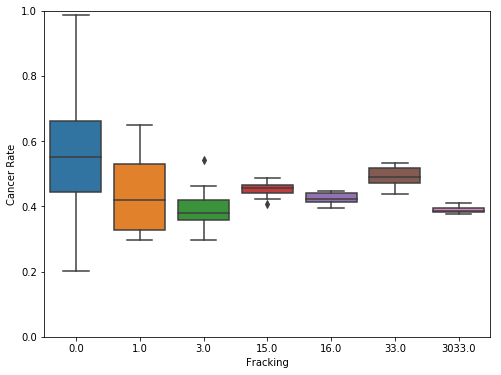

In [18]:
var = 'Fracking'
data = pd.concat([df_train['Cancer Rate'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Cancer Rate", data=data)
fig.axis(ymin=0, ymax=1)
#split into 2 bars less than 10 and more than 10

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


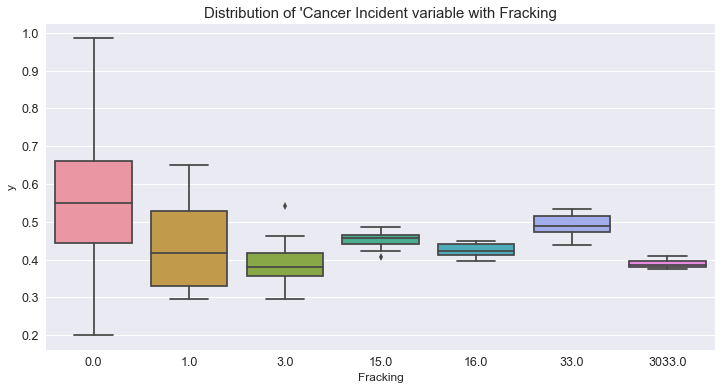

In [39]:
var_name = "Fracking"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y=df_train['Cancer Rate'], data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of Cancer Incident variable with "+var_name, fontsize=15)
plt.show()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


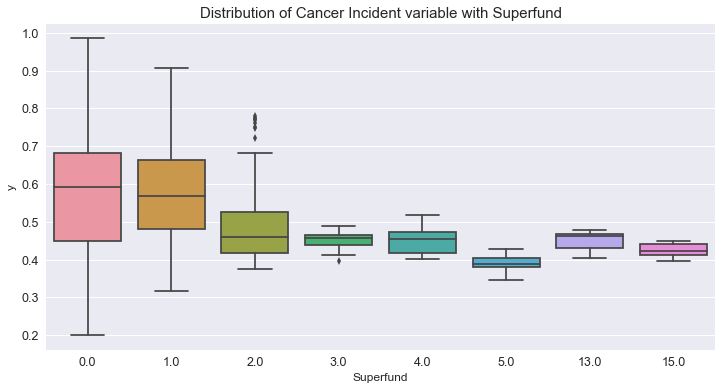

In [44]:
var_name = "Superfund"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y=df_train['Cancer Rate'], data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of Cancer Incident variable with "+var_name, fontsize=15)
plt.show()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(-0.5, 56.5, 0, 1)

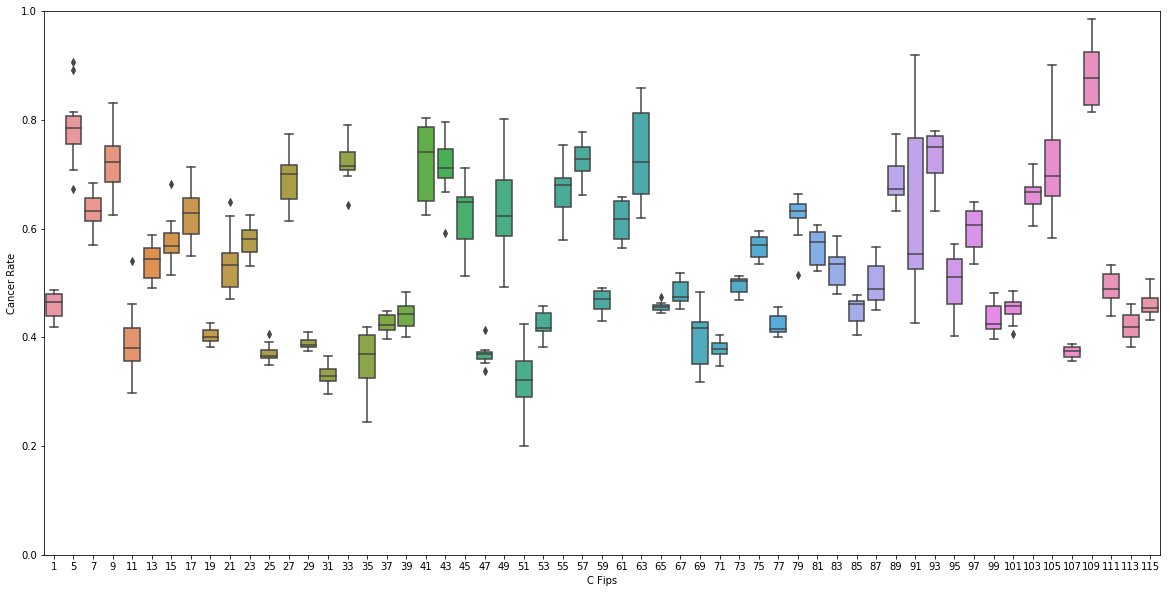

In [20]:
var = 'C Fips'
data = pd.concat([df_train['Cancer Rate'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Cancer Rate", data=data)
fig.axis(ymin=0, ymax=1)

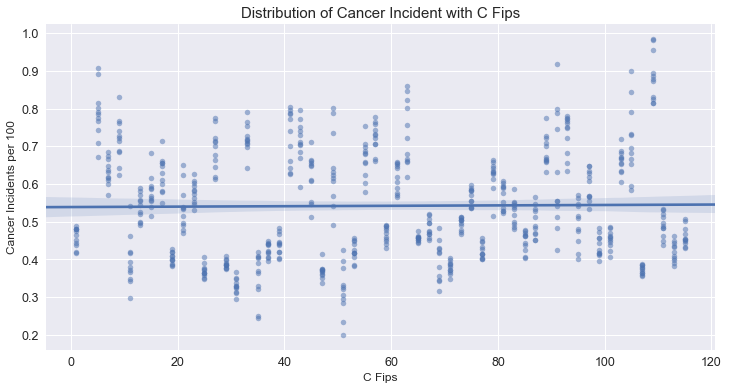

In [47]:
var_name = "C Fips"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y=df_train['Cancer Rate'], data=df_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('Cancer Incidents per 100', fontsize=12)
plt.title("Distribution of Cancer Incident with "+var_name, fontsize=15)
plt.show()

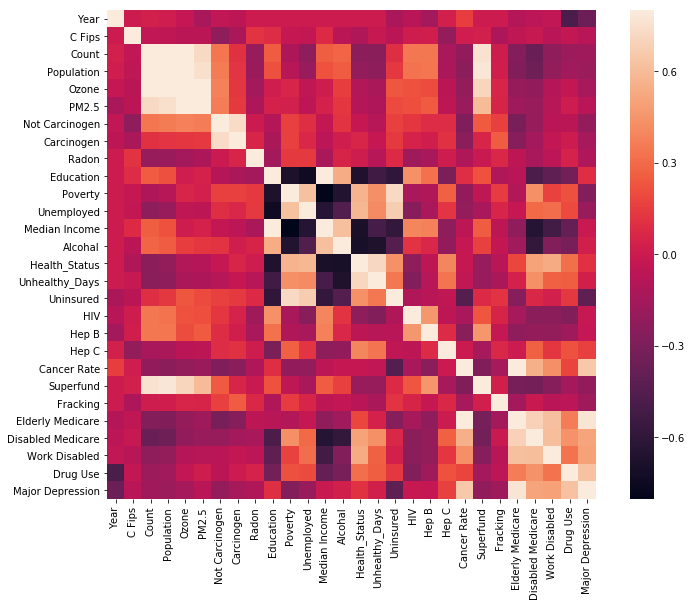

In [22]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

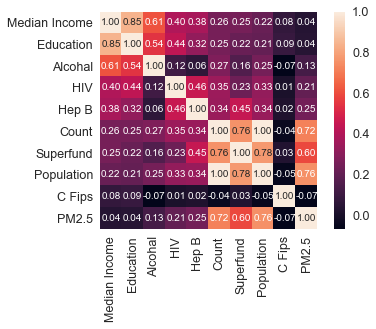

In [23]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Median Income')['Median Income'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25,)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

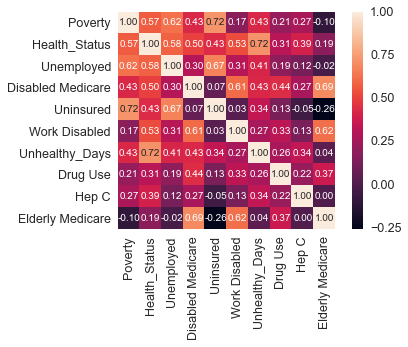

In [26]:
k = 10
cols = corrmat.nsmallest(k, 'Median Income')['Median Income'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25,)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

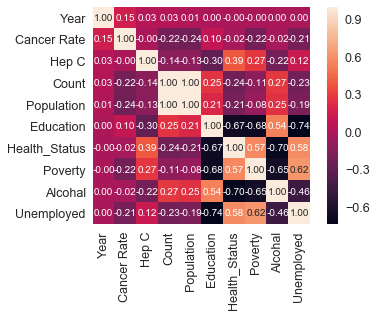

In [25]:
k = 10
cols = corrmat.nlargest(k, 'Year')['Year'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25,)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

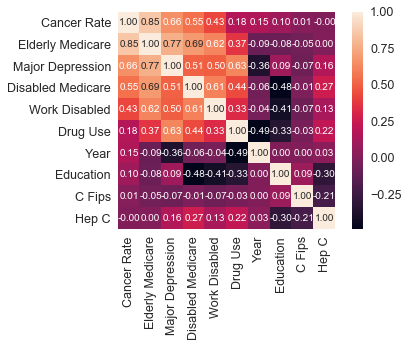

In [24]:
k = 10 
cols = corrmat.nlargest(k, 'Cancer Rate')['Cancer Rate'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25,)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

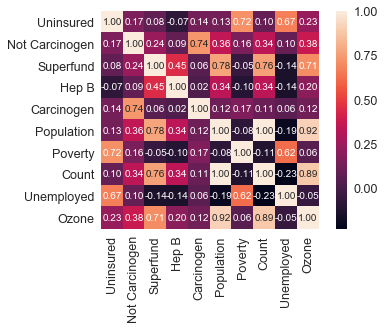

In [27]:
k = 10 
cols = corrmat.nsmallest(k, 'Cancer Rate')['Cancer Rate'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25,)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

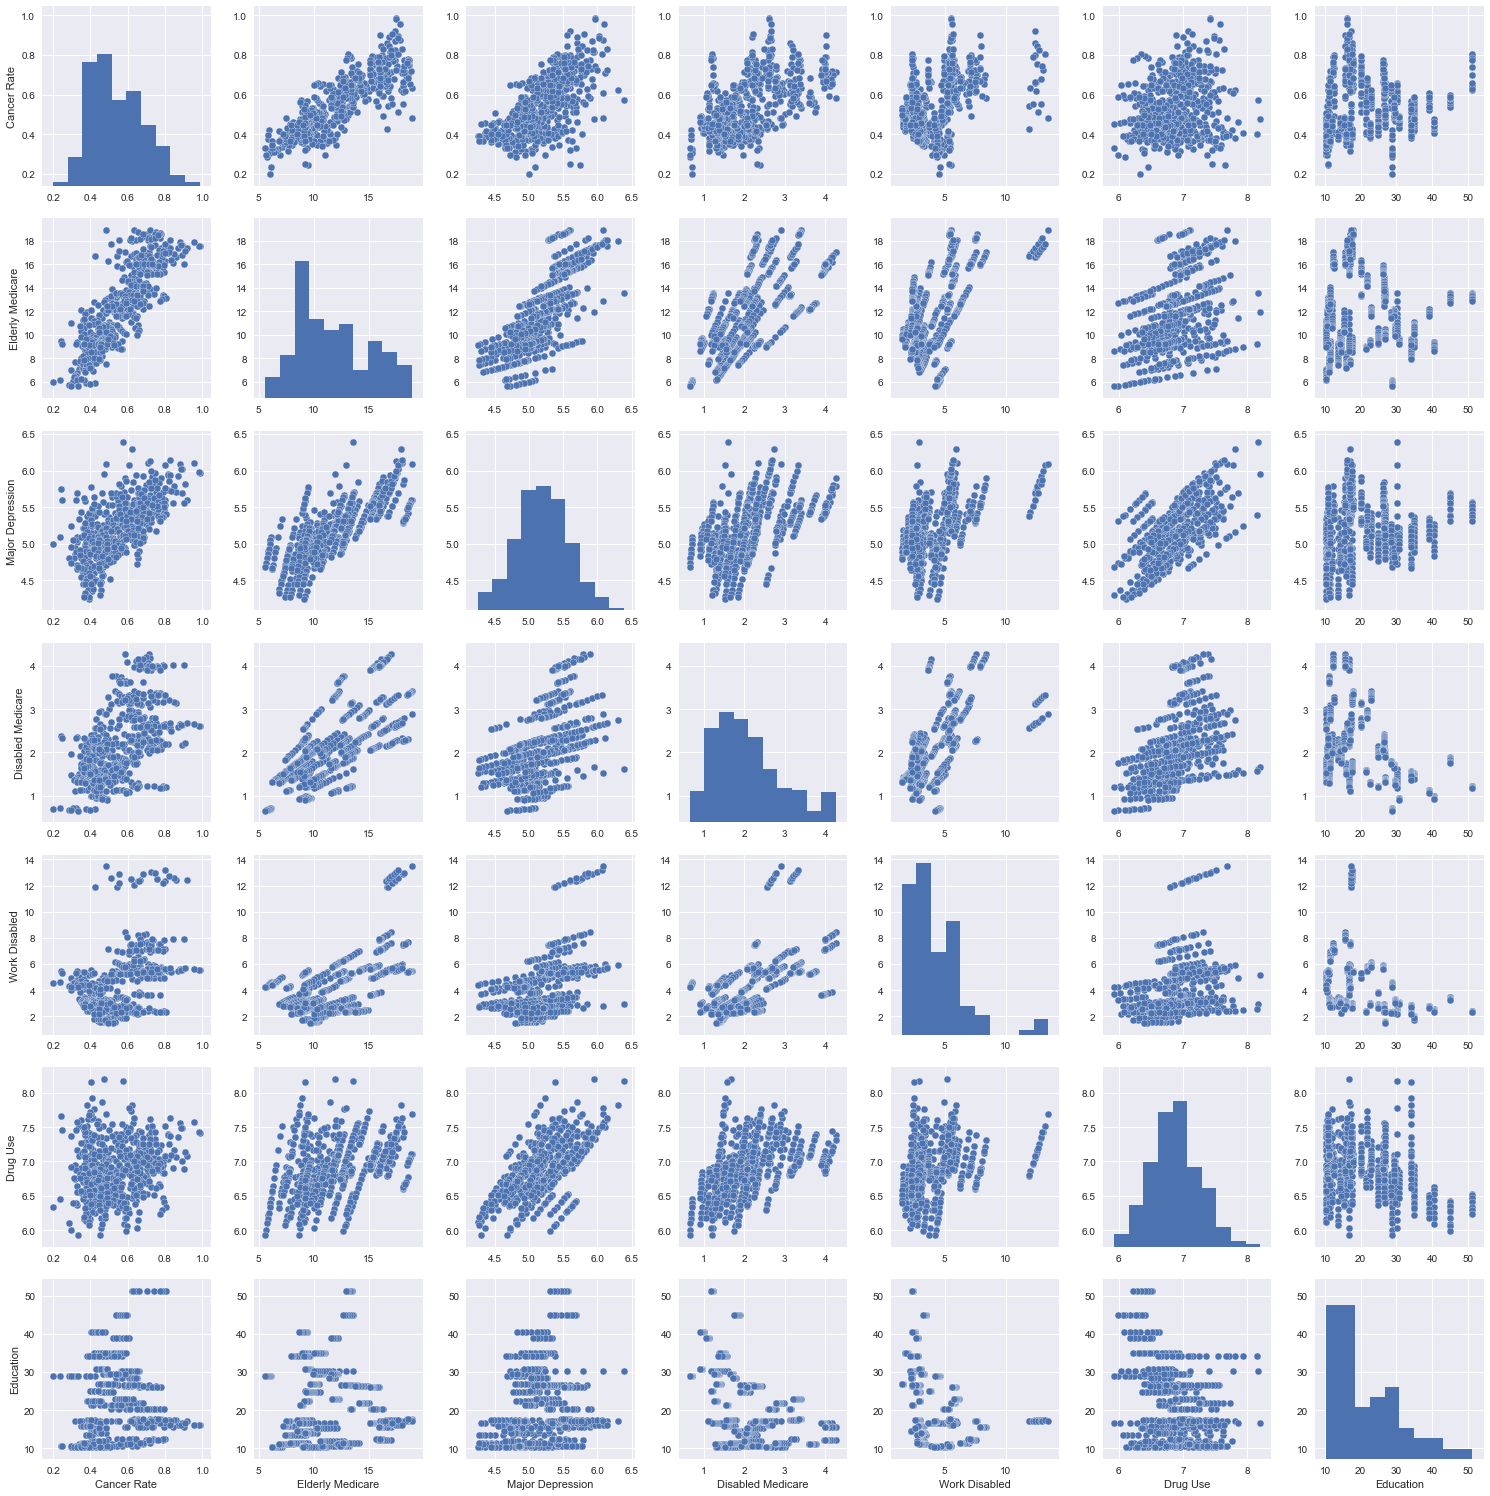

In [50]:
sns.set()
cols = ['Cancer Rate', 'Elderly Medicare', 'Major Depression', 'Disabled Medicare', 'Work Disabled', 'Drug Use', 'Education']
sns.pairplot(df_train[cols], size = 3)
plt.show()
#title increase size of words

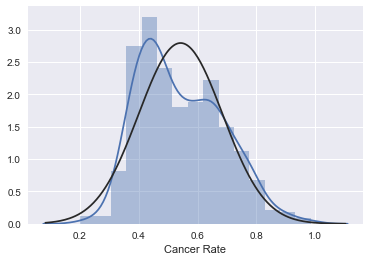

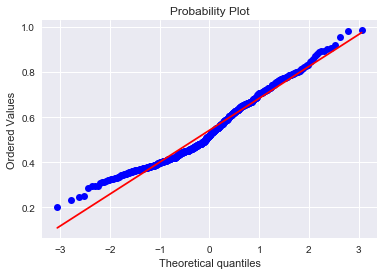

In [62]:
sns.distplot(df_train['Cancer Rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Cancer Rate'], plot=plt)

In [63]:
df_train['Cancer Rate'] = np.log(df_train['Cancer Rate'])

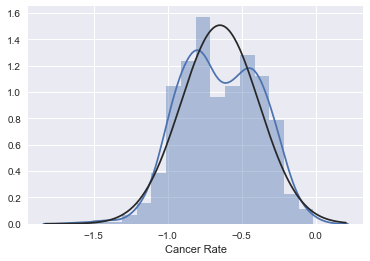

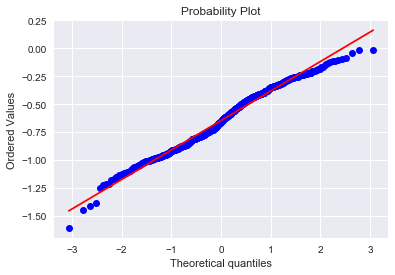

In [64]:
sns.distplot(df_train['Cancer Rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Cancer Rate'], plot=plt)

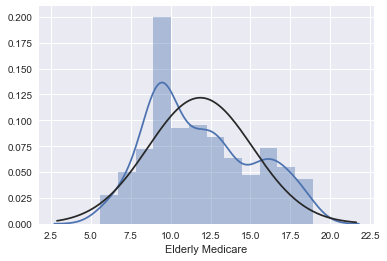

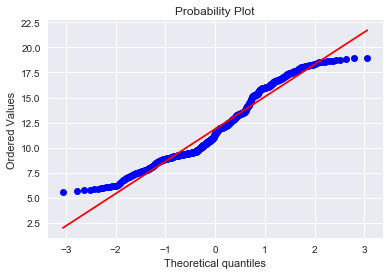

In [65]:
sns.distplot(df_train['Elderly Medicare'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Elderly Medicare'], plot=plt)

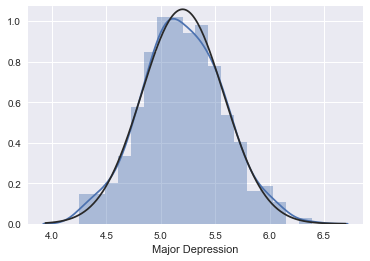

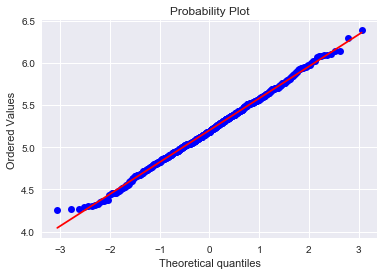

In [66]:
sns.distplot(df_train['Major Depression'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Major Depression'], plot=plt)

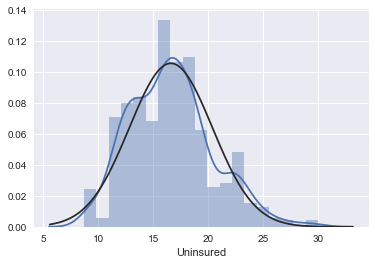

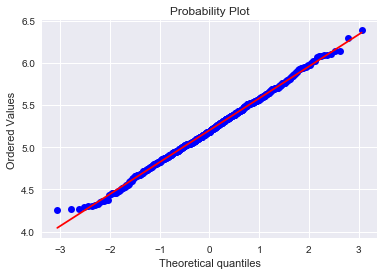

In [72]:
sns.distplot(df_train['Uninsured'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Major Depression'], plot=plt)

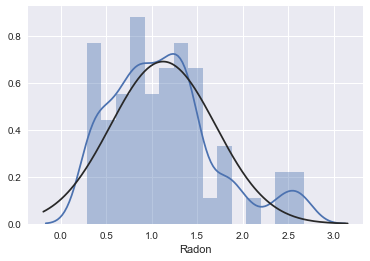

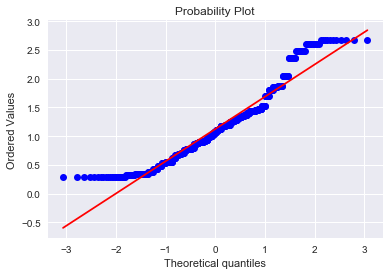

In [71]:
sns.distplot(df_train[df_train['Radon']>0]['Radon'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['Radon']>0]['Radon'], plot=plt)

In [11]:
x = df_train.corr()
x = x['Cancer Rate']
x.sort_values()

Uninsured           -0.452138
Not Carcinogen      -0.288272
Superfund           -0.282638
Hep B               -0.248720
Carcinogen          -0.248108
Population          -0.241834
Poverty             -0.220247
Count               -0.218200
Unemployed          -0.208816
Ozone               -0.208263
PM2.5               -0.185005
Fracking            -0.145374
HIV                 -0.136246
Radon               -0.107009
Median Income       -0.057323
Unhealthy_Days      -0.043754
Health_Status       -0.024558
Alcohal             -0.022969
Hep C               -0.004037
C Fips               0.012662
Education            0.096813
Year                 0.152655
Drug Use             0.179754
Work Disabled        0.427284
Disabled Medicare    0.554762
Major Depression     0.655116
Elderly Medicare     0.854802
Cancer Rate          1.000000
Name: Cancer Rate, dtype: float64